In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#1: Load the data into Python
df = pd.read_csv(r"C:\Users\TIMOTHY\Desktop\Python 2021 Advanced\Assignments\Heart_Decision_Predictive Analytics\heart_decision.csv")
df.head(1)

,sex,chol,restecg,target
0,1,233,0,1


In [3]:
#Generate descriptive statistics. Descriptive statistics include those that summarize the central tendency, 
#dispersion and shape of a dataset's distribution. Generate various summary statistics, 
#excluding NaN values. The output DataFrame index depends on the requested dtypes:
df.describe()

,sex,chol,restecg,target
count,50.000000,50.000000,50.000000,50.000000
mean,0.740000,246.660000,0.460000,0.400000
std,0.443087,47.310787,0.503457,0.494872
min,0.000000,167.000000,0.000000,0.000000
25%,0.250000,216.750000,0.000000,0.000000
50%,1.000000,239.000000,0.000000,0.000000
75%,1.000000,275.750000,1.000000,1.000000
max,1.000000,354.000000,1.000000,1.000000


In [4]:
# select features and targets
target = df.target
features = df.drop(columns=['target'])

features.head()
target.head()

,sex,chol,restecg
0,1,233,0
1,1,250,1
2,0,204,0
3,1,236,1
4,0,354,1


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

[Text(0.5, 1.0, 'Heart Disease vs No Disease')]

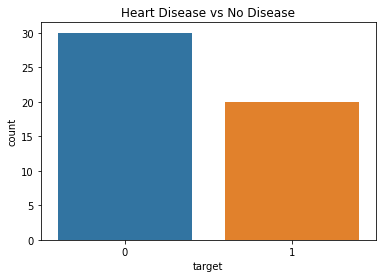

In [5]:
#Create a countplot of the target
ax = sns.countplot(x=target,data=df)
ax.set(title="Heart Disease vs No Disease")
plt.show()

(array([ 5.,  5.,  4., 12.,  6.,  6.,  6.,  1.,  2.,  3.]),
 array([167. , 185.7, 204.4, 223.1, 241.8, 260.5, 279.2, 297.9, 316.6,
        335.3, 354. ]),
 <BarContainer object of 10 artists>)

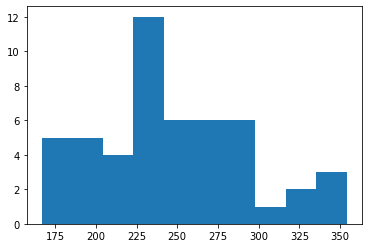

In [6]:
plt.hist(df.chol)
plt.show()

In [7]:
# Scale: replaces the values by their Z scores.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaledfeatures = sc.fit_transform(features) # scale our features

In [8]:
from sklearn.model_selection import train_test_split

features_train, features_test,target_train,target_test = train_test_split(scaledfeatures,target)

In [9]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(features_train,target_train)

DecisionTreeClassifier(random_state=0)

In [10]:
# predict with your model
predictions = model.predict(features_test)
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [11]:
# confusion matrix
predictions = model.predict(features_test)
predictions.shape

pd.crosstab(target_test, predictions,rownames = ['Actual'],colnames = ['Predicted'])

(13,)

Predicted,0,1
Actual,,
0,4,2
1,3,4


In [12]:
from sklearn.metrics import classification_report
# Test Accuracy
print('\n ****** Classification Report *** \n\n')
print(classification_report(target_test, predictions))


 ****** Classification Report *** 


              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.67      0.57      0.62         7

    accuracy                           0.62        13
   macro avg       0.62      0.62      0.62        13
weighted avg       0.62      0.62      0.62        13



In [19]:
# plot tree
from IPython.display import Image  
from sklearn import tree
import pydotplus  



# Create DOT data
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=features.columns,  
                                class_names='target')

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())